# Copy Model  Data Analysis

### Imports

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
from scipy.signal import butter, filtfilt
from IPython.display import display


### Load and Clean Up Data

In [31]:
def process(inp_name, out_name):
    i = 0
    with open(inp_name, "r") as file:
        with open(out_name, "w") as out:
            out.write("k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time\n")
            ctr = 0
            row = ""
            for line in file:
                line = line.rstrip().split(" ")
                if ctr == 0:
                    row = f"{line[0]},{line[1]},{line[2]},{line[3]},{line[4]},"
                elif ctr == 3:
                    #print(line)
                    row += f"{line[6]}," 
                elif ctr == 9:
                    row += f"{line[6]},"
                elif ctr == 10:
                    row += f"{line[2]},"
                elif ctr == 11:
                    row += f"{line[4]},"
                elif ctr == 12:
                    row += f"{line[4]},"
                elif ctr == 13:
                    row += f"{line[2]}\n"
                    out.write(row)
                    ctr = -1
                ctr += 1
                i += 1

In [32]:
process("results_i=True.txt", "results1.csv")
process("results_i=False.txt", "results2.csv")

In [33]:
data1 = pd.read_csv("results1.csv")
data1['ignore'] = True
data1.head()

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
0,8,0,1.0,0.5,1,copy:,1.90954,1625594,10.4667,0.5,11,True
1,8,0,1.0,0.5,4,copy:,1.89134,1721290,11.7168,0.5,10,True
2,8,0,1.0,0.5,8,copy:,1.87976,1462529,14.3274,0.5,12,True
3,8,0,1.0,0.7,1,copy:,2.00000,0,NaN,NaN,23,True
4,8,0,1.0,0.7,4,copy:,2.00000,0,NaN,NaN,49,True


In [34]:
data2 = pd.read_csv("results2.csv")
data2['ignore'] = False
data2.head()

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
0,8,0,1.0,0.5,1,copy:,2.05446,5615942,4.02969,0.359202,12,False
1,8,0,1.0,0.5,4,copy:,1.95501,2467534,9.17334,0.400046,13,False
2,8,0,1.0,0.5,8,copy:,1.92317,1682160,13.45670,0.422740,14,False
3,8,0,1.0,0.7,1,copy:,2.03750,22602773,1.00000,0.448447,30,False
4,8,0,1.0,0.7,4,copy:,1.41914,22602773,1.00000,0.578871,63,False


In [35]:
data1.fillna(0, inplace=True)
data2.fillna(0, inplace=True)

### Time Comparison

In [36]:
display(data1.nsmallest(5, 'time'))
display(data2.nsmallest(5, 'time'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
27,8,1,1.00,0.5,1,copy:,1.96706,3836127,4.90178,0.413603,9,True
36,8,1,0.10,0.5,1,copy:,2.14009,3836127,4.90178,0.284007,9,True
45,8,1,0.01,0.5,1,copy:,2.39343,3836127,4.90178,0.245891,9,True
1,8,0,1.00,0.5,4,copy:,1.89134,1721290,11.71680,0.500000,10,True
9,8,0,0.10,0.5,1,copy:,2.06360,1625594,10.46670,0.500000,10,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
45,8,1,0.01,0.5,1,copy:,2.40594,3836127,5.90178,0.182137,9,False
27,8,1,1.00,0.5,1,copy:,2.02964,3836127,5.90178,0.331281,10,False
36,8,1,0.10,0.5,1,copy:,2.16237,3836127,5.90178,0.206195,10,False
18,8,0,0.01,0.5,1,copy:,2.43173,5615942,4.02969,0.117184,11,False
0,8,0,1.00,0.5,1,copy:,2.05446,5615942,4.02969,0.359202,12,False


### Average Info Comparison

In [37]:
display(data1.nsmallest(10, 'avg_info'))
display(data2.nsmallest(10, 'avg_info'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
17,8,0,0.10,0.8,8,copy:,1.15486,5225926,3.18332,0.934478,31,True
26,8,0,0.01,0.8,8,copy:,1.16593,5225926,3.18332,0.987242,31,True
71,10,0,0.10,0.8,8,copy:,1.20585,4272048,3.81603,0.932343,26,True
80,10,0,0.01,0.8,8,copy:,1.22032,4272048,3.81603,0.985787,28,True
16,8,0,0.10,0.8,4,copy:,1.25238,5299851,2.84237,0.930293,23,True
44,8,1,0.10,0.8,8,copy:,1.25883,5709555,2.96235,0.912688,32,True
25,8,0,0.01,0.8,4,copy:,1.26187,5299851,2.84237,0.987745,23,True
53,8,1,0.01,0.8,8,copy:,1.26995,5709555,2.96235,0.964525,31,True
70,10,0,0.10,0.8,4,copy:,1.27044,4333288,3.51139,0.929241,23,True
79,10,0,0.01,0.8,4,copy:,1.28379,4333288,3.51139,0.986237,21,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
5,8,0,1.0,0.7,8,copy:,1.17131,22602773,1.0,0.631143,106,False
8,8,0,1.0,0.8,8,copy:,1.17131,22602773,1.0,0.631143,106,False
59,10,0,1.0,0.7,8,copy:,1.26949,21751576,1.0,0.616464,82,False
62,10,0,1.0,0.8,8,copy:,1.26949,21751576,1.0,0.616464,84,False
35,8,1,1.0,0.8,8,copy:,1.40365,11309996,2.0,0.628343,62,False
4,8,0,1.0,0.7,4,copy:,1.41914,22602773,1.0,0.578871,63,False
7,8,0,1.0,0.8,4,copy:,1.41914,22602773,1.0,0.578871,62,False
89,10,1,1.0,0.8,8,copy:,1.42599,10989757,2.0,0.620291,50,False
58,10,0,1.0,0.7,4,copy:,1.44582,21751576,1.0,0.577819,49,False
61,10,0,1.0,0.8,4,copy:,1.44582,21751576,1.0,0.577819,50,False


In [38]:
display(data1['avg_info'].mean())
display(data2['avg_info'].mean())

1.7793463425925917

2.002913611111112

### Avg Length Comparison

In [39]:
display(data1.nlargest(5, 'avg_len'))
display(data2.nlargest(5, 'avg_len'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
164,14,0,1.00,0.5,8,copy:,1.87994,231941,63.0661,0.500002,13,True
173,14,0,0.10,0.5,8,copy:,1.90270,231941,63.0661,0.500002,13,True
182,14,0,0.01,0.5,8,copy:,1.93466,231941,63.0661,0.500002,13,True
163,14,0,1.00,0.5,4,copy:,1.88104,236805,61.3818,0.500002,13,True
172,14,0,0.10,0.5,4,copy:,1.90428,236805,61.3818,0.500002,13,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
191,14,1,1.00,0.5,8,copy:,1.89455,535694,29.4212,0.354445,13,False
200,14,1,0.10,0.5,8,copy:,1.91971,535694,29.4212,0.249134,13,False
209,14,1,0.01,0.5,8,copy:,1.96104,535694,29.4212,0.228989,13,False
190,14,1,1.00,0.5,4,copy:,1.89621,548115,28.6014,0.354479,13,False
199,14,1,0.10,0.5,4,copy:,1.92198,548115,28.6014,0.249197,13,False


### Load Best Parameters

In [40]:
arr1 = []

with open("inst_info_8_0_01_08_8_i.txt", "r") as file:
    for line in file:
        arr1.append(float(line.rstrip()))

arr1 = np.array(arr1)

In [41]:
arr2 = []

with open("inst_info_8_0_1_07_8.txt", "r") as file:
    for line in file:
        arr2.append(float(line.rstrip()))


### Apply Low pass filter to data

In [42]:
# Define the filter parameters
fs = 100  # Sampling frequency (Hz)
cutoff = 5  # Cutoff frequency (Hz)
order = 2  # Filter order

# Calculate the filter coefficients using a Butterworth filter
b, a = butter(order, cutoff / (fs / 2), btype='low')

# Apply the filter using the filtfilt function
y1 = filtfilt(b, a, arr1)
y2 = filtfilt(b, a, arr2)

### Plots

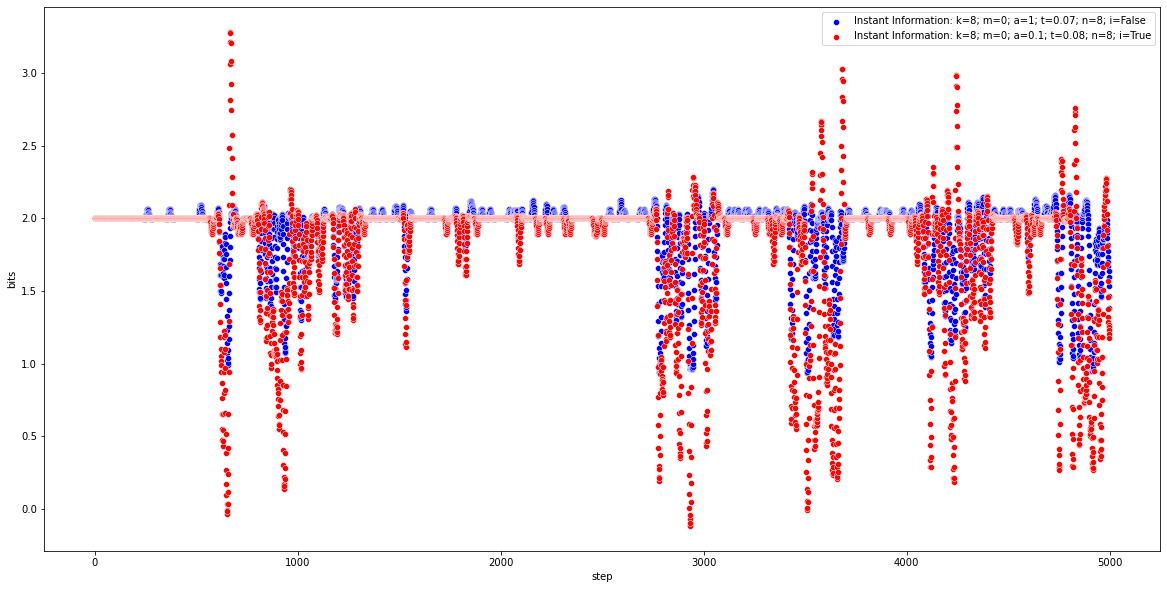

In [43]:
start = 0
end = 5_000

plt.figure(figsize=(20,10))
sns.scatterplot(x=range(len(y2[start:end])), y=y2[start:end], color='blue')
sns.scatterplot(x=range(len(y1[start:end])), y=y1[start:end], color='red')
#sns.scatterplot(x=range(len(y1[:1000])), y=arr1[:1000], color='green')
#sns.scatterplot(x=range(len(y1[:1000])), y=arr2[:1000], color='yellow')
plt.xlabel('step')
plt.ylabel('bits')
plt.legend(labels=['Instant Information: k=8; m=0; a=1; t=0.07; n=8; i=False', 'Instant Information: k=8; m=0; a=0.1; t=0.08; n=8; i=True'])